In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"CarPrice_Assignment.csv")
pd.options.display.max_columns= None
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
for col in df.columns:
    print(f"{col: <15} {df[col].nunique(): >5}")

car_ID            205
symboling           6
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
wheelbase          53
carlength          75
carwidth           44
carheight          49
curbweight        171
enginetype          7
cylindernumber      7
enginesize         44
fuelsystem          8
boreratio          38
stroke             37
compressionratio    32
horsepower         59
peakrpm            23
citympg            29
highwaympg         30
price             189


In [5]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'cylindernumber', 'doornumber'])

# Split the data into X (features) and y (target variable)
X = df.drop(['car_ID', 'price', 'CarName'], axis=1)
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)

print(f"{'Mean Absolute Error:': <30}", mae)
print(f"{'Mean Squared Error:': <30} ", mse)
print(f"{'Root Mean Squared Error: ': <30} ", rmse)
print(f"{'r2 score: ': <30}", r2)

Mean Absolute Error:           1864.357731707317
Mean Squared Error:             7950167.554094854
Root Mean Squared Error:        2819.6041484745433
r2 score:                      0.8992936074764408


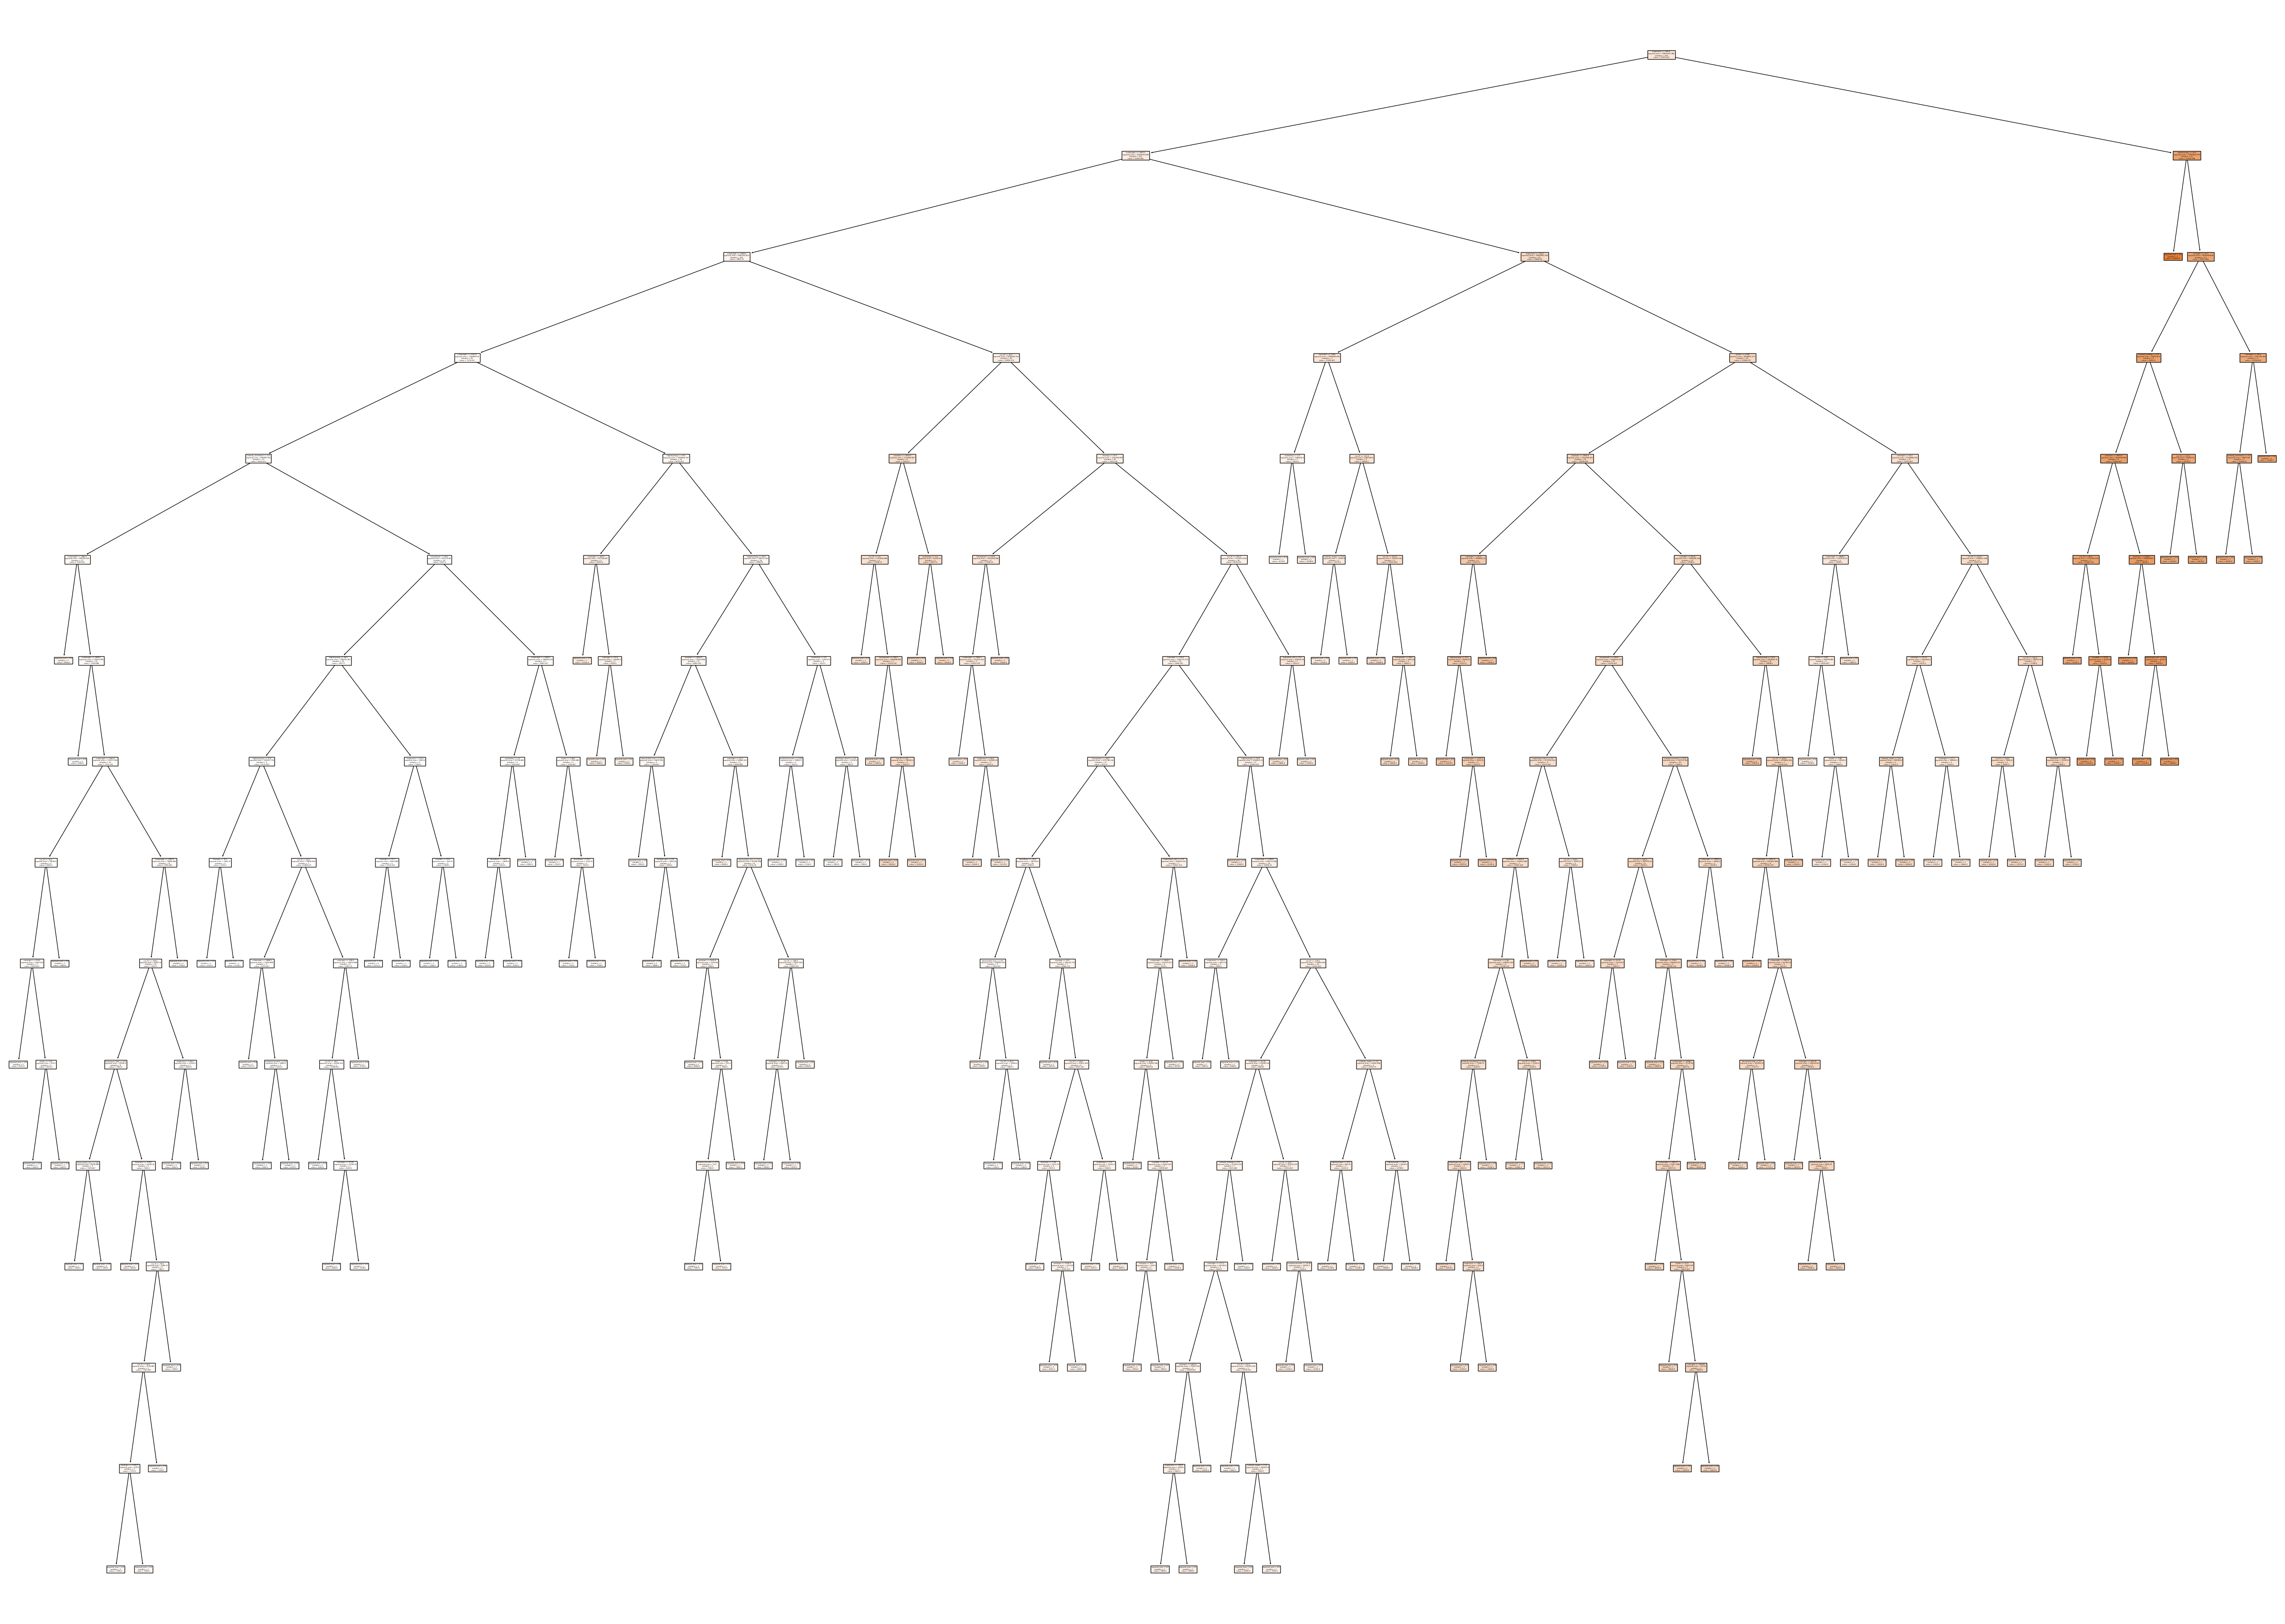

In [10]:
plt.figure(figsize=(30, 15))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

## *Overfitting Example*

Regressor MSE: 0.023937644888100785


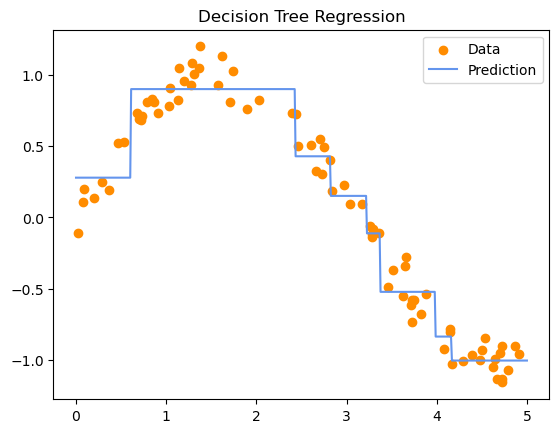

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("Regressor MSE:", mean_squared_error(y_test, y_pred))

# Plot
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_plot = reg.predict(X_plot)
plt.scatter(X, y, color="darkorange", label="Data")
plt.plot(X_plot, y_plot, color="cornflowerblue", label="Prediction")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()